In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\s.wienecke\Documents\Fortbildung\Letztes Modul'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_clean_6.2.csv'))

In [5]:
df.shape

(268850, 33)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,typeOfFlat,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category
0,0,0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.0,96107057,oil,False,True,2.0,595.0,86.00,False,4,ground_floor,44269,4.0,1.000000,4,True,4,Dortmund,Schüren,May19,Least pictures
1,1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.0,111378734,gas,False,False,1.0,800.0,89.00,False,5,ground_floor,67459,3.0,2.122405,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,Least pictures
2,2,2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.0,113147523,NaN,False,True,9.0,965.0,83.80,True,6,apartment,1097,3.0,3.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19,Least pictures
3,3,3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.0,108890903,district_heating,False,False,2.0,343.0,58.15,False,2,other,9599,3.0,3.000000,3,False,2,Mittelsachsen_Kreis,Freiberg,May19,Least pictures
4,4,4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.0,114751222,gas,False,False,1.0,765.0,84.97,False,5,apartment,28213,3.0,1.000000,3,False,4,Bremen,Neu_Schwachhausen,Feb20,Few pictures


 # 2. Cleaning, manipulations & reprocessing

In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'state', 'serviceCharge', 'heatingType',
       'telekomTvOffer', 'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'lift', 'baseRentRange', 'typeOfFlat',
       'postcode', 'noRooms', 'floor', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'city/county', 'city district', 'date',
       'Picture category'],
      dtype='object')

In [9]:
# dropping colums
df2 = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'state','heatingType', 'telekomTvOffer', 'firingTypes', 'typeOfFlat','balcony', 'newlyConst', 'firingTypes', 'hasKitchen', 'cellar',  'lift', 'typeOfFlat', 'postcode', 'garden', 'city/county', 'city district', 'date',
       'Picture category'])

In [10]:
df2.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,floor,noRoomsRange,livingSpaceRange
0,245.00,6,4.62,10.000000,840.000000,1965.0,96107057,2.0,595.0,86.00,4,4.0,1.000000,4,4
1,134.00,8,3.47,10.000000,901.331522,1871.0,111378734,1.0,800.0,89.00,5,3.0,2.122405,3,4
2,255.00,8,2.72,2.400000,1300.000000,2019.0,113147523,9.0,965.0,83.80,6,3.0,3.000000,3,4
3,58.15,9,1.53,40.000000,901.331522,1964.0,108890903,2.0,343.0,58.15,2,3.0,3.000000,3,2
4,138.00,19,2.46,28.804928,903.000000,1950.0,114751222,1.0,765.0,84.97,5,3.0,1.000000,3,4


C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='baseRent', ylabel='Density'>

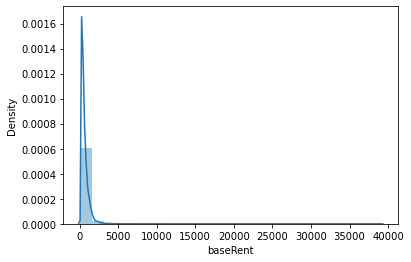

In [11]:
# Shows extreme values
sns.distplot(df2['baseRent'], bins=25)

In [12]:
df2['baseRent'].value_counts()

350.00      3810
450.00      3558
300.00      3152
400.00      2985
650.00      2905
            ... 
210.44         1
20000.00       1
573.31         1
805.35         1
738.50         1
Name: baseRent, Length: 26655, dtype: int64

C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='baseRent', ylabel='Density'>

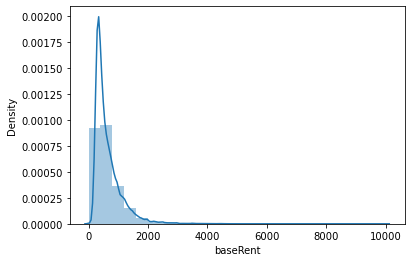

In [13]:
df2.loc[df2['baseRent'] >10000, 'baseRent'] = np.nan

sns.distplot(df2['baseRent'], bins=25)

C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='noRooms', ylabel='Density'>

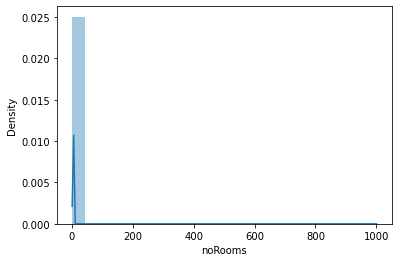

In [14]:
sns.distplot(df2['noRooms'], bins=25)

In [15]:
df2['noRooms'].value_counts()

3.0      92089
2.0      89038
1.0      27805
4.0      27776
2.5       9583
         ...  
14.0         1
560.0        1
50.0         1
2.9          1
1.3          1
Name: noRooms, Length: 64, dtype: int64

C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='noRooms', ylabel='Density'>

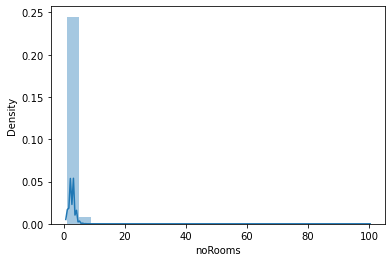

In [16]:
df2.loc[df2['noRooms'] >100, 'noRooms'] = np.nan

sns.distplot(df2['noRooms'], bins=25)

C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serviceCharge', ylabel='Density'>

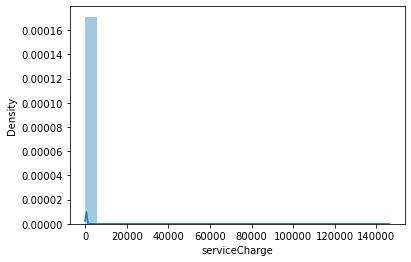

In [17]:
sns.distplot(df2['serviceCharge'], bins=25)

In [18]:
df2['serviceCharge'].value_counts()

150.00    14293
100.00    12995
200.00    11147
120.00    10650
130.00     7455
          ...  
375.79        1
445.15        1
280.55        1
159.85        1
135.01        1
Name: serviceCharge, Length: 12267, dtype: int64

C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serviceCharge', ylabel='Density'>

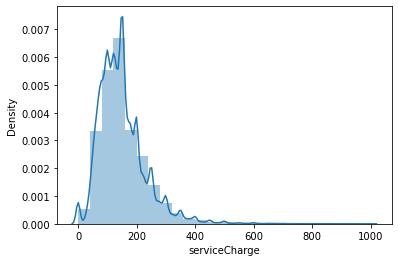

In [19]:
df2.loc[df2['serviceCharge'] >1000, 'serviceCharge'] = np.nan

sns.distplot(df2['serviceCharge'], bins=25)

C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='livingSpace', ylabel='Density'>

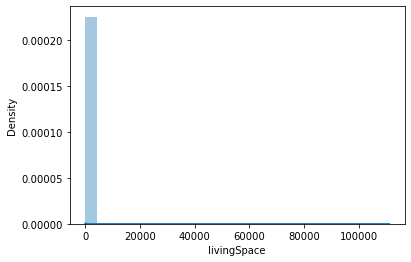

In [20]:
sns.distplot(df2['livingSpace'], bins=25)

In [21]:
df2['livingSpace'].value_counts()

60.00     5189
70.00     4154
80.00     4031
65.00     3808
75.00     3692
          ... 
155.74       1
152.86       1
102.07       1
151.20       1
145.55       1
Name: livingSpace, Length: 13005, dtype: int64

C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='livingSpace', ylabel='Density'>

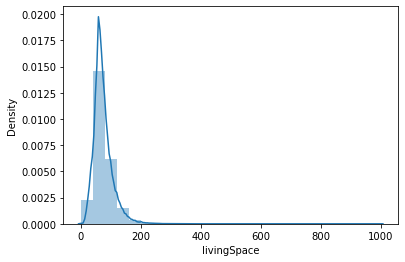

In [22]:
df2.loc[df2['livingSpace'] >1000, 'livingSpace'] = np.nan

sns.distplot(df2['livingSpace'], bins=25)

In [23]:
#showing total record count of missing values
df2.isnull().sum().sum()

160

In [24]:
# Check for missing values
df2.isnull().sum()

serviceCharge           111
picturecount              0
pricetrend                0
telekomUploadSpeed        0
totalRent                 0
yearConstructed           0
scoutId                   0
yearConstructedRange      0
baseRent                 29
livingSpace              12
baseRentRange             0
noRooms                   8
floor                     0
noRoomsRange              0
livingSpaceRange          0
dtype: int64

In [25]:
column_median = df2.median()
df2 = df2.fillna(column_median)

In [26]:
df2.isnull().sum().sum()

0

# 3. The elbow technique

In [27]:
# Defining the range of potential clusters in the data.
num_cl = range(1, 10)

# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [28]:
# Creating a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 

score

[-4.201418250192265e+19,
 -1.0549628863644975e+19,
 -5.364693005109221e+18,
 -3.0362852084524273e+18,
 -1.9838642814234798e+18,
 -1.4610157622551396e+18,
 -1.0295420548416429e+18,
 -7.608042315256067e+17,
 -6.157300893187258e+17]

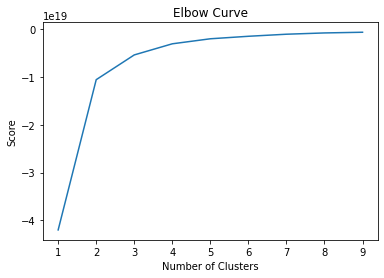

In [29]:
# Ploting the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In the graph there is a jump on the x-axis from two to three, but after that the curve becomes straight again. This means that the optimal number for your clusters is three.

# 4. k-means clustering

In [30]:
# Creating the k-means object.
kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [31]:
# Fitting the k-means object to the data.
kmeans.fit(df2)

C:\Users\s.wienecke\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [32]:
# Attaching a new column to the dataframe with the resulting clusters
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\s.wienecke\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [33]:
df2.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,floor,noRoomsRange,livingSpaceRange,clusters
0,245.00,6,4.62,10.000000,840.000000,1965.0,96107057,2.0,595.0,86.00,4,4.0,1.000000,4,4,1
1,134.00,8,3.47,10.000000,901.331522,1871.0,111378734,1.0,800.0,89.00,5,3.0,2.122405,3,4,0
2,255.00,8,2.72,2.400000,1300.000000,2019.0,113147523,9.0,965.0,83.80,6,3.0,3.000000,3,4,0
3,58.15,9,1.53,40.000000,901.331522,1964.0,108890903,2.0,343.0,58.15,2,3.0,3.000000,3,2,0
4,138.00,19,2.46,28.804928,903.000000,1950.0,114751222,1.0,765.0,84.97,5,3.0,1.000000,3,4,0


In [34]:
df2['clusters'].value_counts()

0    231579
1     25864
2     11407
Name: clusters, dtype: int64

## Creating a few different visualizations

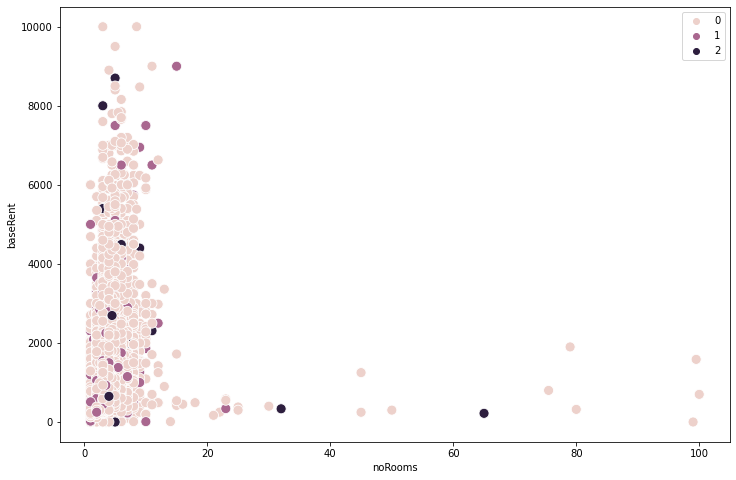

In [35]:
# Ploting the clusters for the "noRooms" and "baseRent" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['noRooms'], y=df2['baseRent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('noRooms') # Label x-axis.
plt.ylabel('baseRent') # Label y-axis.
plt.show()

The cluster with the most points is the 0/pink cluster. This main cluster is predominantly located between 0 and 20 rooms and 0 and 8000 baseRent. The other two clusters 1/purple and 2/dark purple can only be seen very sporadically in the graph. 

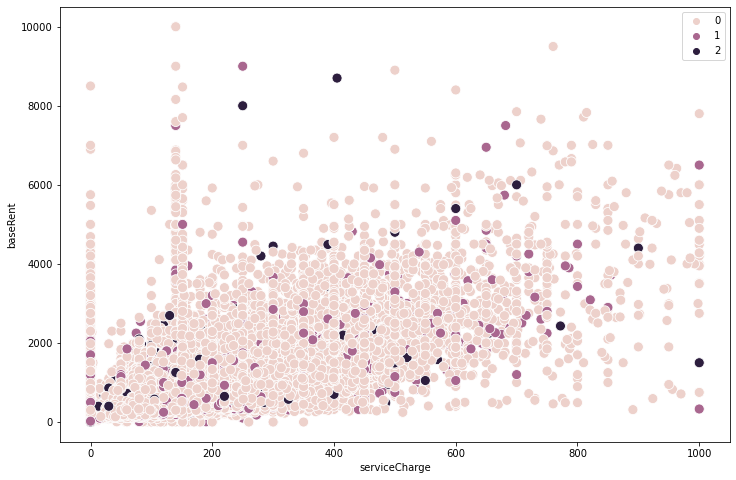

In [36]:
# Ploting the clusters for the "serviceCharge" and "baseRent" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['serviceCharge'], y=df2['baseRent'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('serviceCharge') 
plt.ylabel('baseRent') 
plt.show()

Similar to the previous graph, the cluster distribution here also shows a similar picture. The cluster with the most points is the 0/pink cluster. This main cluster is mainly located between 0 and 800 service charge and 0 and 6000 baseRent. The other two clusters 1/purple and 2/dark purple can only be seen very sporadically in the graph. 

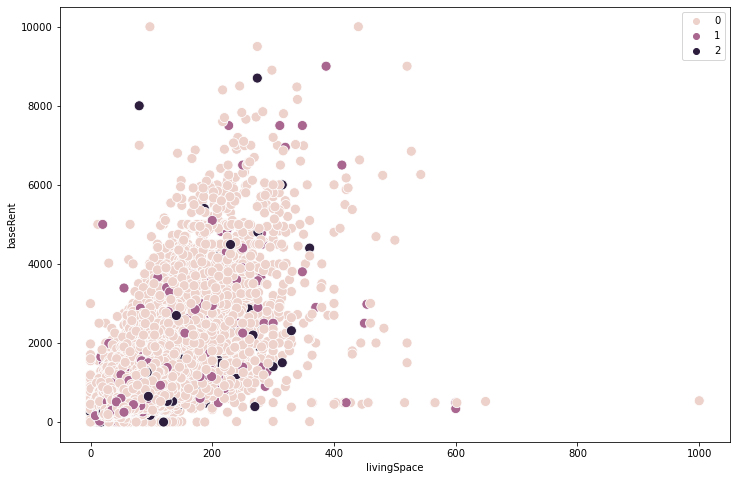

In [37]:
# Ploting the clusters for the "livingSpace" and "baseRent" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['livingSpace'], y=df2['baseRent'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('livingSpace') 
plt.ylabel('baseRent') 
plt.show()

And the third graph also confirms the other two graphs in the cluster distribution. The cluster with the most points is the 0/pink cluster. This main cluster is mainly located between 0 and 400 living space and 0 and 7000 baseRent. The other two clusters 1/purple and 2/dark purple can only be seen very sporadically in the graph. 

## Calculate the descriptive statistics for the clusters 

In [38]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [39]:
df2.groupby('cluster').agg({'noRooms':['mean', 'median'], 
                         'serviceCharge':['mean', 'median'], 
                         'livingSpace':['mean', 'median'],
                          'baseRent':['mean', 'median']})

noRooms        serviceCharge         livingSpace         \
                 mean median          mean  median        mean median   
cluster                                                                 
dark purple  2.552761    2.5    134.988523  123.05   70.244029   65.0   
pink         2.645888    3.0    151.610050  140.00   73.973476   68.0   
purple       2.534821    2.5    140.195012  130.00   70.510865   65.0   

               baseRent         
                   mean median  
cluster                         
dark purple  535.286059  430.0  
pink         658.434229  499.0  
purple       587.748890  450.0

The pink cluster has the largest number of rooms, the largest living space but also the highest baseRent and the highest service charge. However, more rooms and more space then also lead to more costs. 

The purple cluster is characterised by the lowest ancillary costs and the lowest basic rent, whether in comparison dark purple hardly differs in the other values.  

The dark purple group is in the middle range for all values. 

It is interesting that the values for Number of Rooms and Living Space are very close to each other. There are only minor differences here. Fewer rooms and less space do not necessarily mean that you pay less/ have lower costs. 

### Propose what these results could be useful for in future steps of an analytics pipeline

The cluster analysis has shown that the data produces at least one category "more housing through more rooms and/or through more space". This category is also related to more costs (higher service charge and higher baseRent).

Unfortunately, other categories cannot be identified through this analysis, as the values in the other clusters are very close to each other. 

In [40]:
# export df2 to folder Prepared Data
df2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'immo_data_final.csv'))